### Loading Libraries & Data

In [2]:
# Importing Libraries

import os        
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from fancyimpute import KNN

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score
%matplotlib inline

In [3]:
#Setting working directory
os.chdir("E:/churn latest")
print(os.getcwd())



E:\churn latest


In [6]:
#Loading Dataset
train_original = pd.read_csv("Train_data.csv")
test_original = pd.read_csv("Test_data.csv")

In [8]:
#Creating Duplicate instances of data for Preprocessing and exploration
train = train_original.copy()
test = test_original.copy()

### Exploring Data

In [72]:
train.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [73]:
#Checking info of data as data types and rows n cols
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [74]:
train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#calculating all the unique values for all df columns
for i in train.columns:
    print(i,' -- ',len(train[i].value_counts()))

state  --  51
account length  --  212
area code  --  3
phone number  --  3333
international plan  --  2
voice mail plan  --  2
number vmail messages  --  46
total day minutes  --  1667
total day calls  --  119
total day charge  --  1667
total eve minutes  --  1611
total eve calls  --  123
total eve charge  --  1440
total night minutes  --  1591
total night calls  --  120
total night charge  --  933
total intl minutes  --  162
total intl calls  --  21
total intl charge  --  162
number customer service calls  --  10
Churn  --  2


In [76]:
#Replacing spaces from columns name with underscore
train.columns = train.columns.str.replace(" ","_")
test.columns = test.columns.str.replace(" ","_")  #for test set also changing names

In [77]:
#Changing area_code type to categorical in both test and train data set
train['area_code'] = train['area_code'].astype('object')
test['area_code'] = test['area_code'].astype('object')

In [78]:
#Droping phone_number
train = train.drop('phone_number',axis=1)
test = test.drop('phone_number',axis=1)

In [79]:
#All continous var list
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

#All categorical var and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


['state', 'area_code', 'international_plan', 'voice_mail_plan']

### Checking Missing Value in Data

In [80]:
#Checking missing values in train dataset
print(train.isnull().sum())  #no missing value present in the train data

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
Churn                            0
dtype: int64


In [81]:
#Checking missing values in test data set
print(test.isnull().sum())  #no missing value present in the test data

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
Churn                            0
dtype: int64


 No missing value found in both train and test data set

### Visualizing data

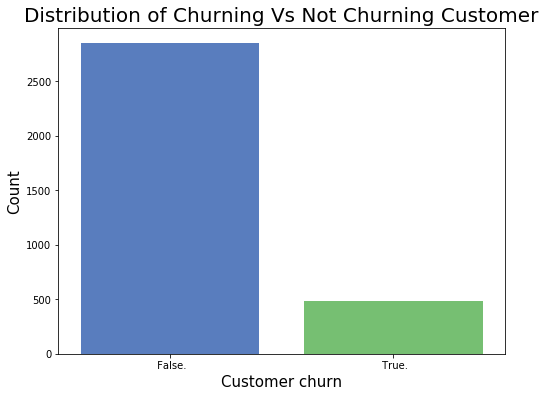

In [82]:
#Target Variable data distribution
plt.figure(figsize=(8,6))
sns.countplot(x = train.Churn,palette='muted')
plt.xlabel('Customer churn', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Churning Vs Not Churning Customer",fontsize= 20)
plt.show()

###### We can see that it's a target class imbalance problem

In [83]:


#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(30,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    #plt.savefig("{X}_Vs_{Y}.png".format(X=x,Y=y))
    plt.show()

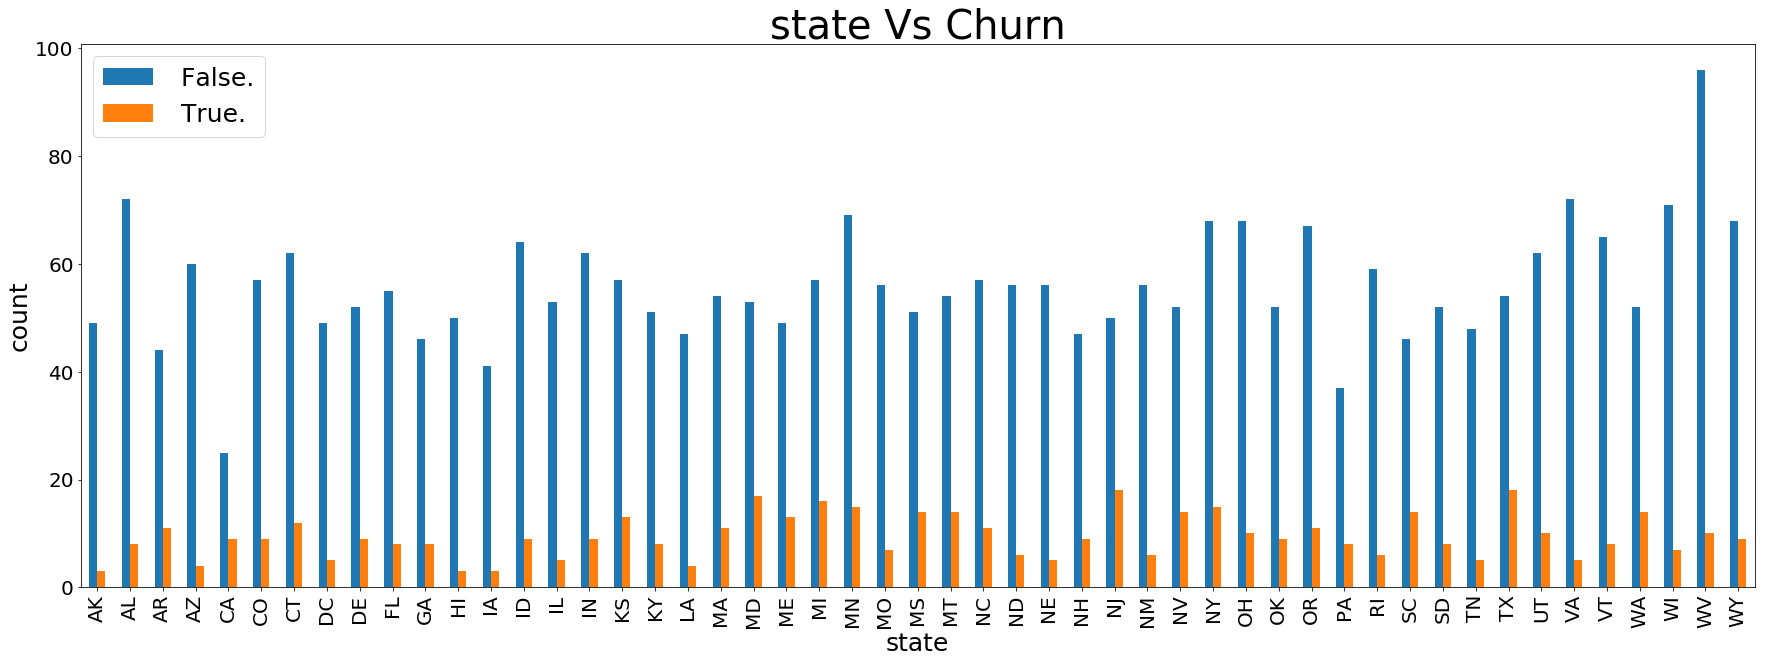

In [84]:
#State Wise Churning of customer
diff_bar('state','Churn')

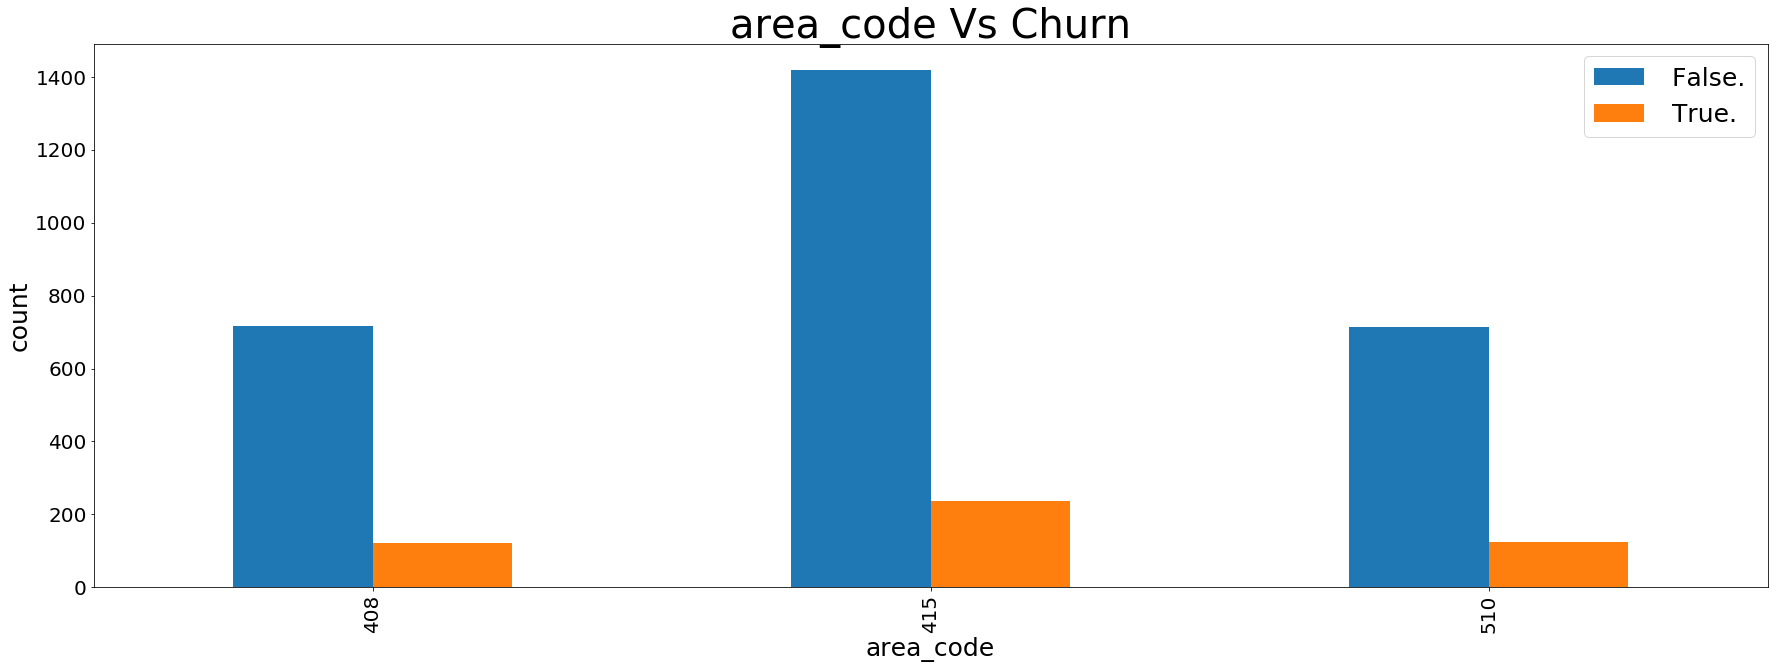

In [85]:
#area_code Wise Churning of customer
diff_bar('area_code','Churn')

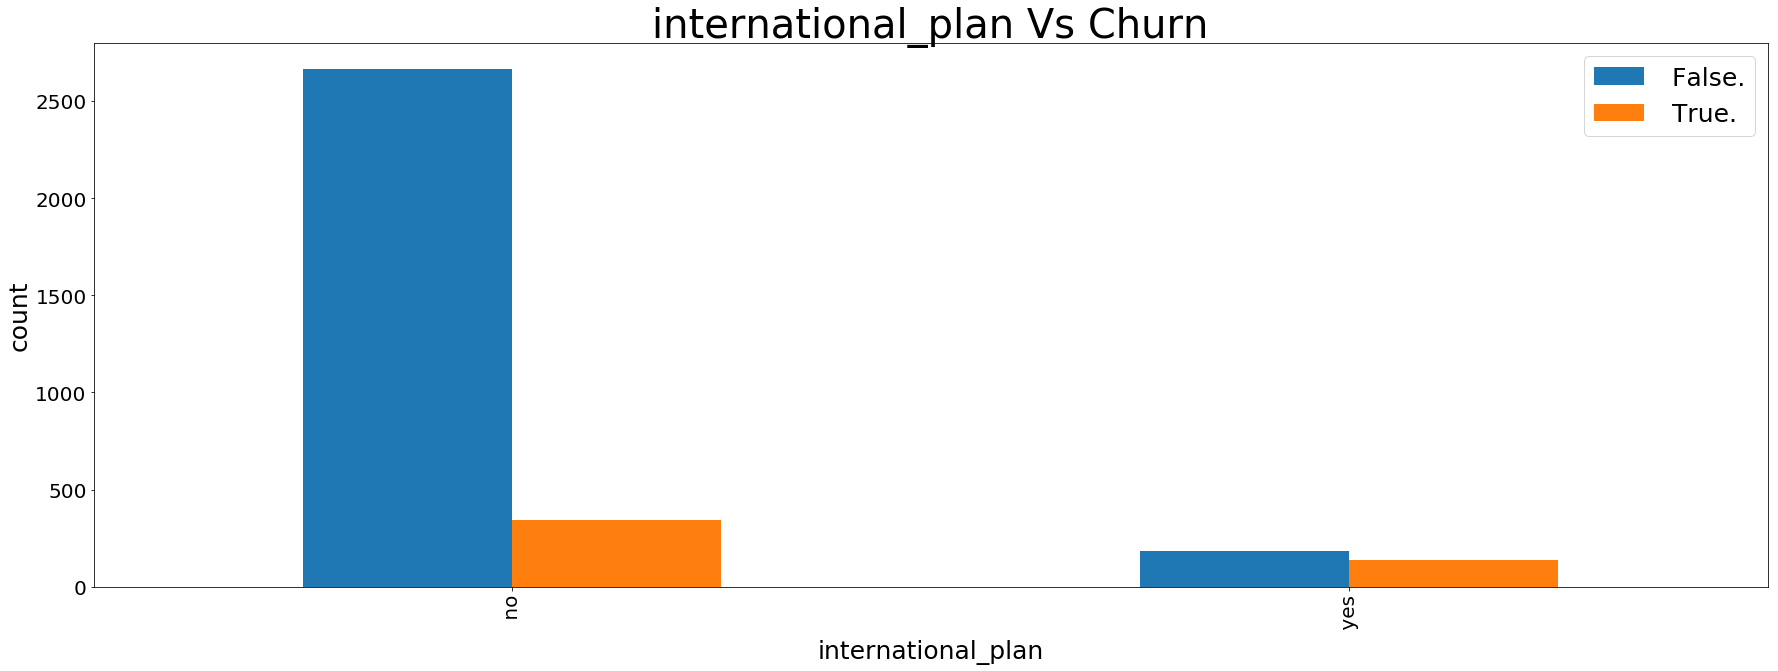

In [86]:
#International_Plan Wise Churning of customer
diff_bar('international_plan','Churn')

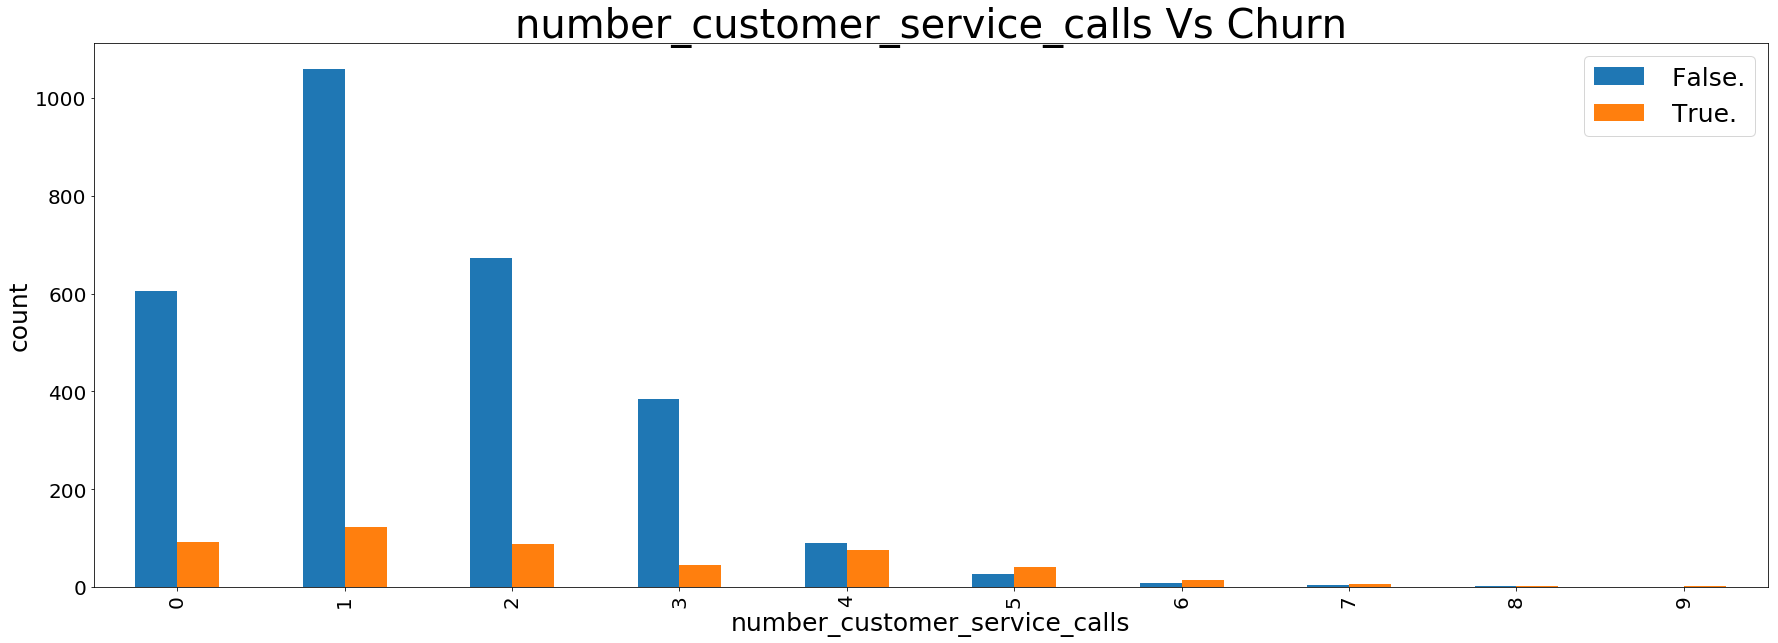

In [87]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('number_customer_service_calls','Churn')

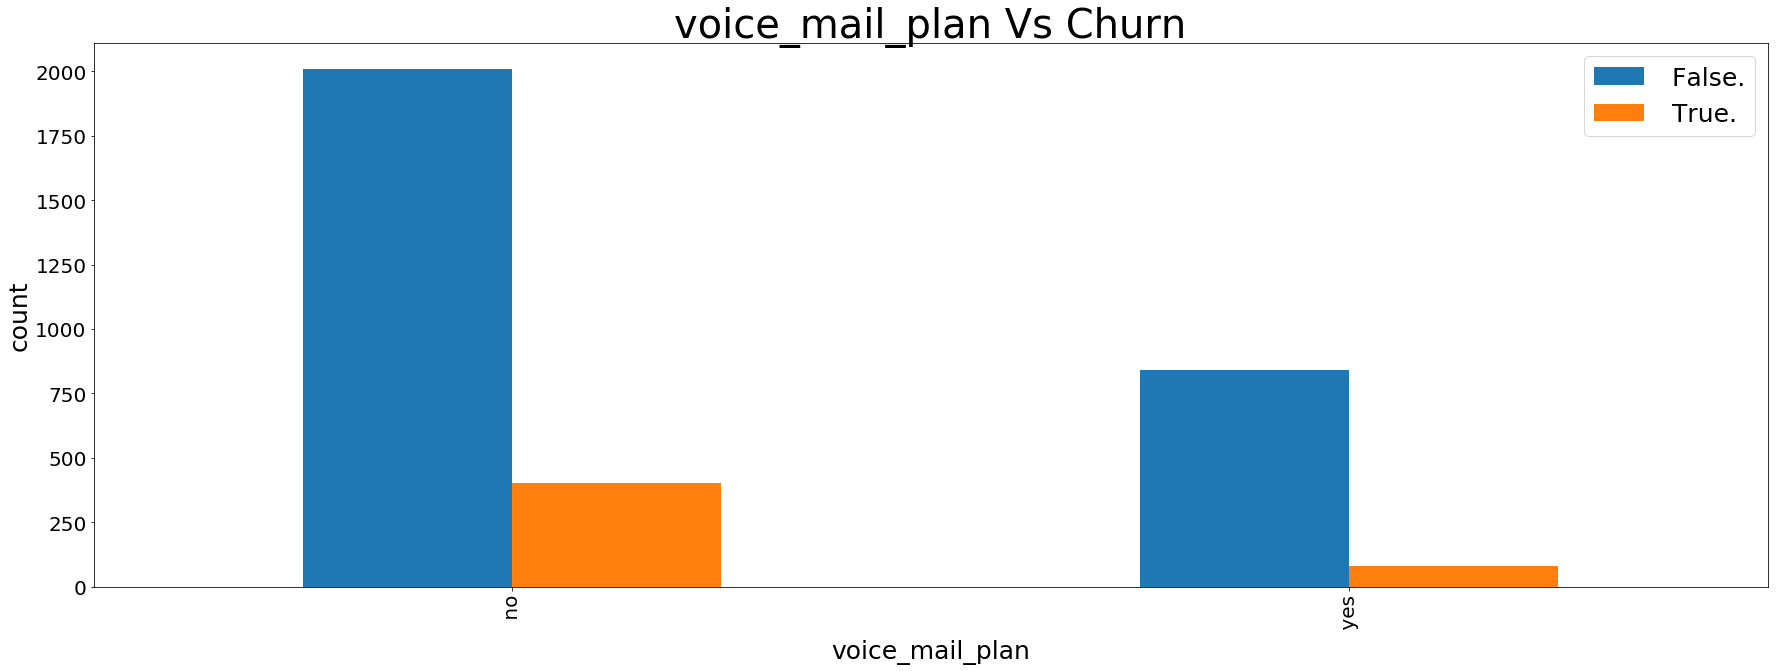

In [88]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice_mail_plan','Churn')

In [89]:


#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=train,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
   
    plt.show()

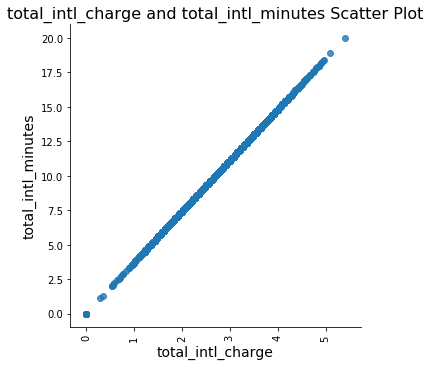

In [90]:
#Total intl charge and Total intl Minute
diff_scattr('total_intl_charge','total_intl_minutes')

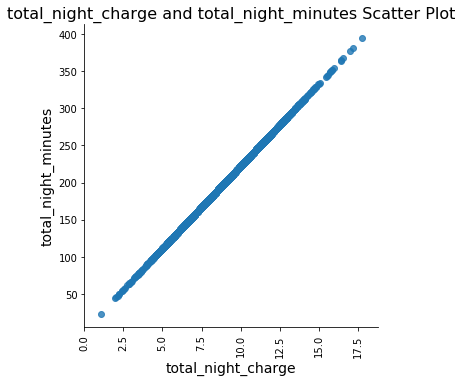

In [91]:
## Total night charge and Total night Minute
diff_scattr('total_night_charge','total_night_minutes')

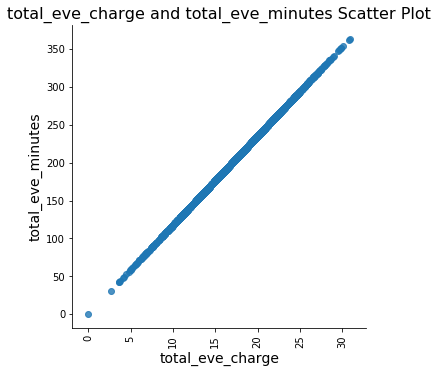

In [92]:
#Total eve charge and Total eve Minute
diff_scattr('total_eve_charge','total_eve_minutes')

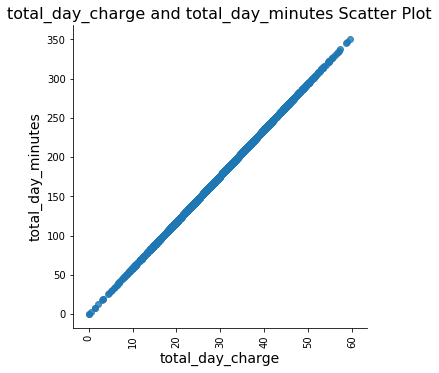

In [93]:
#Total day charge and Total Day Minute
diff_scattr('total_day_charge','total_day_minutes')

### Changing Categorical colum values to numeric codes

In [94]:
#function for converting cat to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [95]:
train = cat_to_num(train)
test = cat_to_num(test)

### Anomaly Detections or Outlier Analysis

Skipping outlier analysis as Their is already an class imbalance impact over data.
Also there are no missing values


### Feature Selections

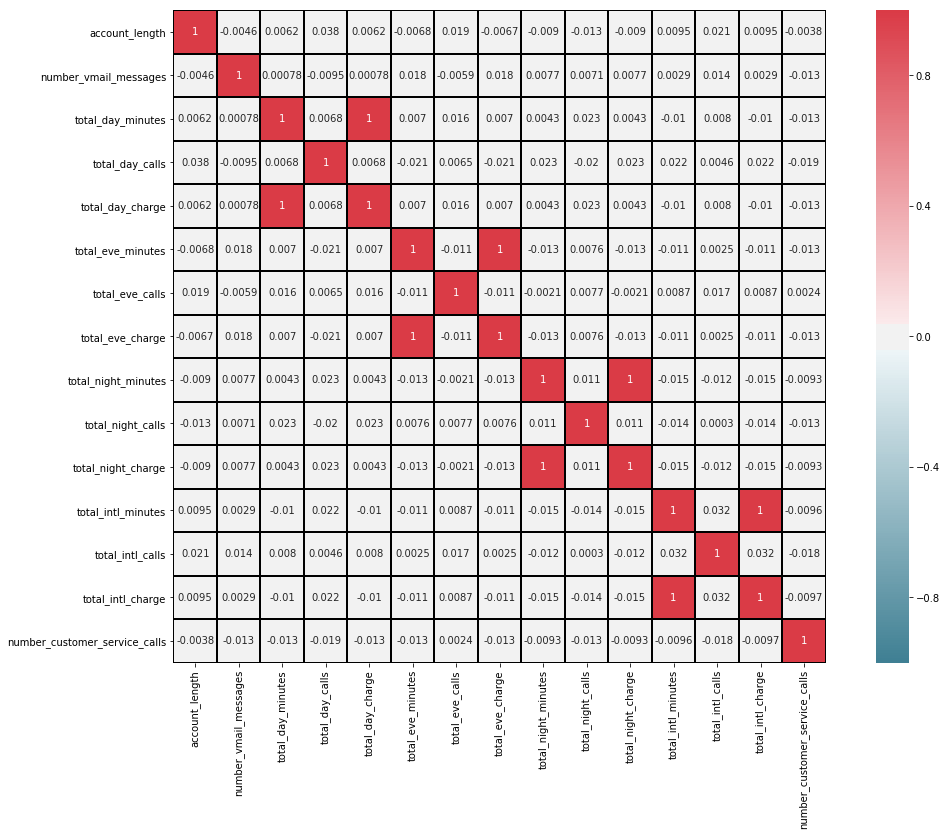

In [100]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generate Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()


#### Chi-Square for Categorical variables

In [101]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis


state
0.002296221552011188
area_code
0.9150556960243712
international_plan
2.4931077033159556e-50
voice_mail_plan
5.15063965903898e-09


In [102]:
#Remove correlated variable & the variable which doesn't contain any meaning full info
rmev = ['state','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
train = train.drop(rmev,axis=1)
test = test.drop(rmev,axis=1)

In [103]:
#Update values after removal of var
cname = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
         'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
         'number_customer_service_calls']

#All categorical var and removing target var
cat_names = ['area_code', 'international_plan', 'voice_mail_plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

cat_name :- ['area_code', 'international_plan', 'voice_mail_plan']


###  Feature Scaling

##### Checking Distribution of data

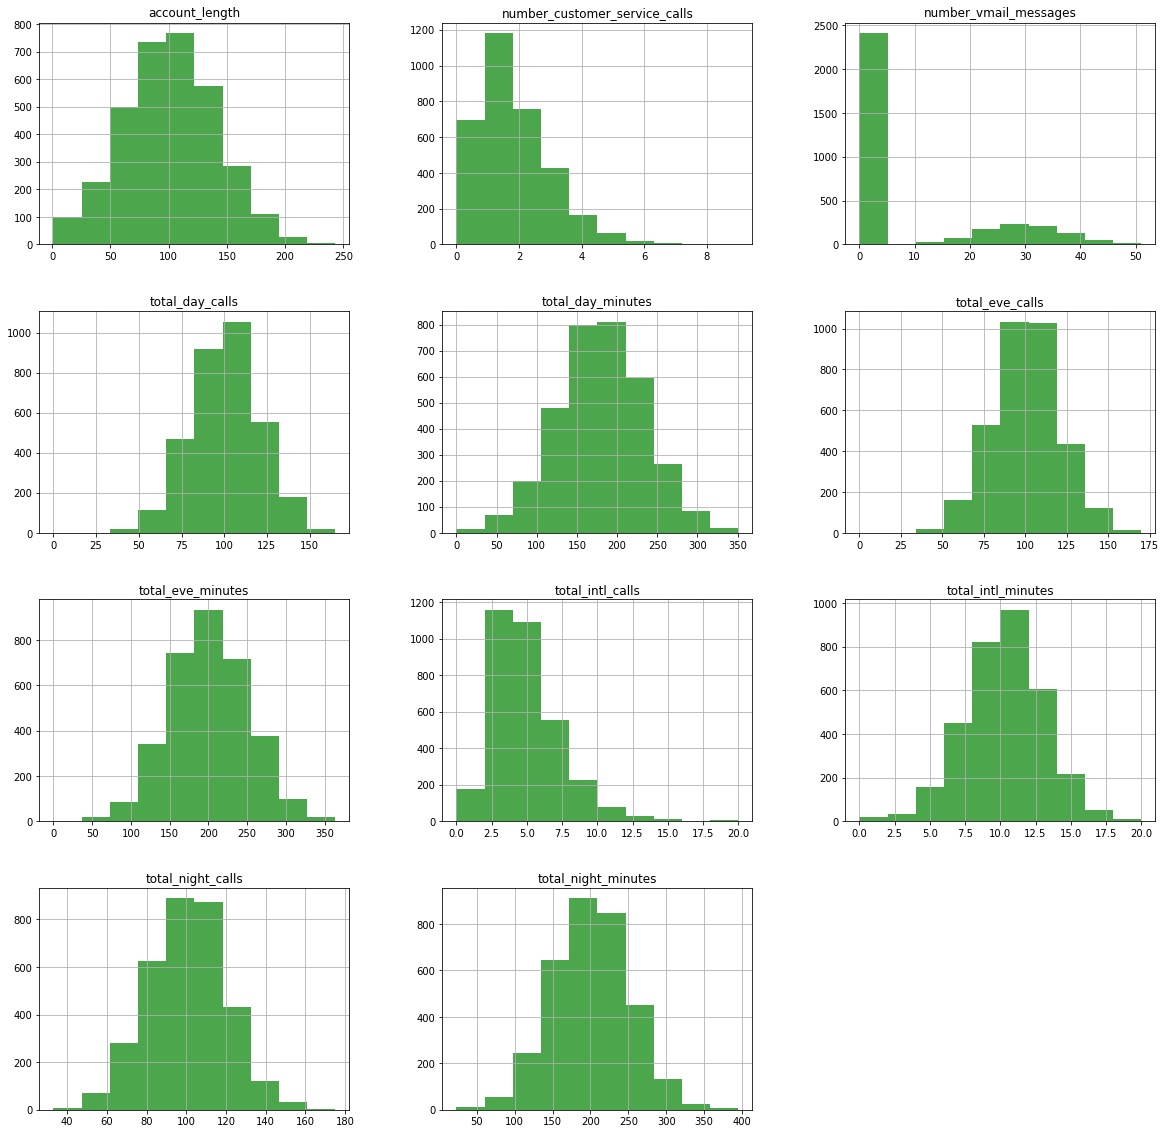

In [104]:
#Check distribution of data via pandas visualization
train[cname].hist(figsize=(20,20),color='g',alpha = 0.7)

plt.show()

In [105]:
#Histogram break down 
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

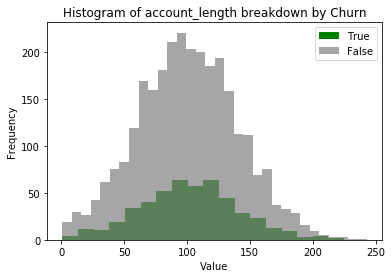

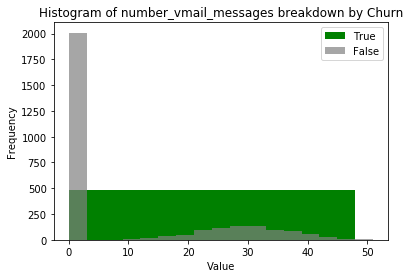

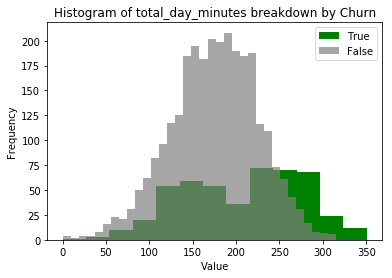

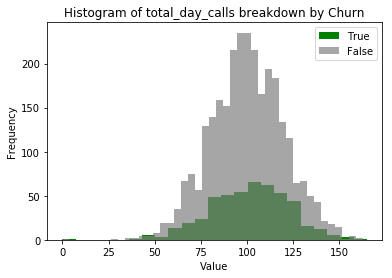

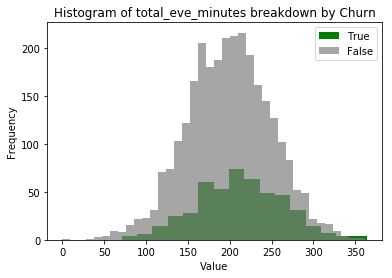

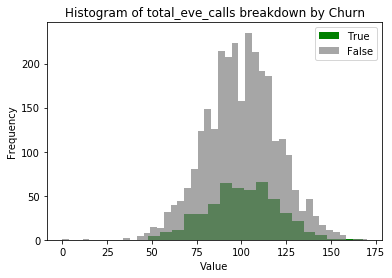

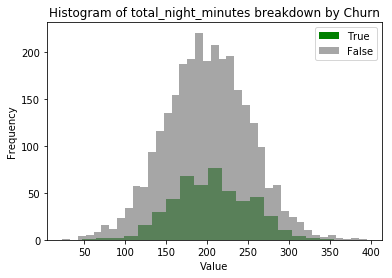

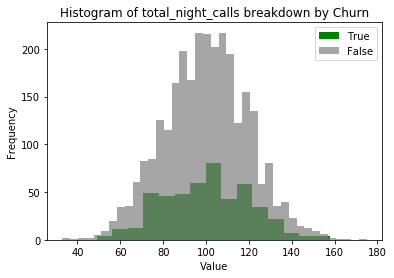

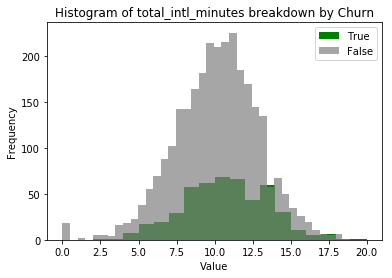

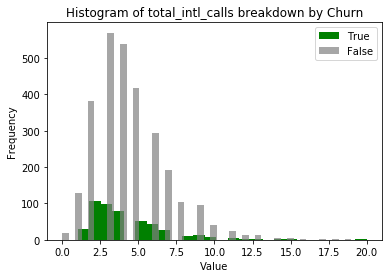

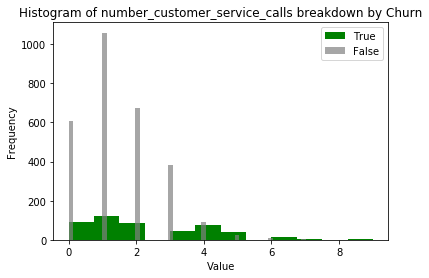

In [106]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.Churn)

### Scalling

In [107]:
#Applying standarization as most of the variables are normalized
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [108]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

### Sampling Data For Train and Test

#### Stratified Sampling

In [109]:
#Using train test split functionality for creatuing sampling
X = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)



In [110]:
(X_train.shape),(y_train.shape)

((2233, 14), (2233,))

### Using SMOTE   ( SMOTE: Synthetic Minority Over-sampling Technique)

Due to target variable is imbalance

In [111]:
# from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [112]:
(X_train_res.shape,y_train_res.shape)

((3790, 14), (3790,))

### Prediction function

In [113]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(compare, model_object.predict_proba(predictors)[:,1])
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------- ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :-------')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))
    print()
    # Calculate the AUC
    print ('AUC -: %0.2f' % auc(fpr, tpr))




### Model Level Approach

#### Just to check which models fits good without optimization




### RandomForest

In [114]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

# Accuracy :-  94.73
# Specificity //  True Negative Rate :-  96.86
# Sensivity // True Positive Rate // Recall :-  80.69
# False Negative Rate :-  19.31
# False Postive Rate :-  3.14
# AUC -: 0.91

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      925   30
1       28  117

Classification paradox :------->>
Accuracy :-  94.73

Specificity //  True Negative Rate :-  96.86

Sensivity // True Positive Rate // Recall :-  80.69

False Negative Rate :-  19.31

False Postive Rate :-  3.14

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       955
          1       0.80      0.81      0.80       145

avg / total       0.95      0.95      0.95      1100


AUC -: 0.91


### Logistic Regression

In [115]:
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  78.18
# Specificity //  True Negative Rate :-  78.74
# Sensivity // True Positive Rate // Recall :-  74.48
# False Negative Rate :-  25.52
# False Postive Rate :-  21.26
#AUC -: 0.81

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      752  203
1       37  108

Classification paradox :------->>
Accuracy :-  78.18

Specificity //  True Negative Rate :-  78.74

Sensivity // True Positive Rate // Recall :-  74.48

False Negative Rate :-  25.52

False Postive Rate :-  21.26

             precision    recall  f1-score   support

          0       0.95      0.79      0.86       955
          1       0.35      0.74      0.47       145

avg / total       0.87      0.78      0.81      1100


AUC -: 0.81


### KNN

In [116]:
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  78.09
# Specificity //  True Negative Rate :-  79.48
# Sensivity // True Positive Rate // Recall :-  68.97
# False Negative Rate :-  31.03
# False Postive Rate :-  20.52
# AUC = 0.80

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      759  196
1       45  100

Classification paradox :------->>
Accuracy :-  78.09

Specificity //  True Negative Rate :-  79.48

Sensivity // True Positive Rate // Recall :-  68.97

False Negative Rate :-  31.03

False Postive Rate :-  20.52

             precision    recall  f1-score   support

          0       0.94      0.79      0.86       955
          1       0.34      0.69      0.45       145

avg / total       0.86      0.78      0.81      1100


AUC -: 0.80


### Navie Bayes

In [117]:
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  78.64
# Specificity //  True Negative Rate :-  78.95
# Sensivity // True Positive Rate // Recall :-  76.55
# False Negative Rate :-  23.45
# False Postive Rate :-  21.05
# AUC = 0.82

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      754  201
1       34  111

Classification paradox :------->>
Accuracy :-  78.64

Specificity //  True Negative Rate :-  78.95

Sensivity // True Positive Rate // Recall :-  76.55

False Negative Rate :-  23.45

False Postive Rate :-  21.05

             precision    recall  f1-score   support

          0       0.96      0.79      0.87       955
          1       0.36      0.77      0.49       145

avg / total       0.88      0.79      0.82      1100


AUC -: 0.82


### Final Model :- Random Forest 
As above random forest fits best for out dataset out of our tested models

##### Hyper Parameter Optimization with RandomSeacrhCV

below code will take time to execute so just made it commented

In [119]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [120]:
#Validating Predictions
pred(final_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      927   28
1       26  119

Classification paradox :------->>
Accuracy :-  95.09

Specificity //  True Negative Rate :-  97.07

Sensivity // True Positive Rate // Recall :-  82.07

False Negative Rate :-  17.93

False Postive Rate :-  2.93

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       955
          1       0.81      0.82      0.82       145

avg / total       0.95      0.95      0.95      1100


AUC -: 0.91


##### Features Importance

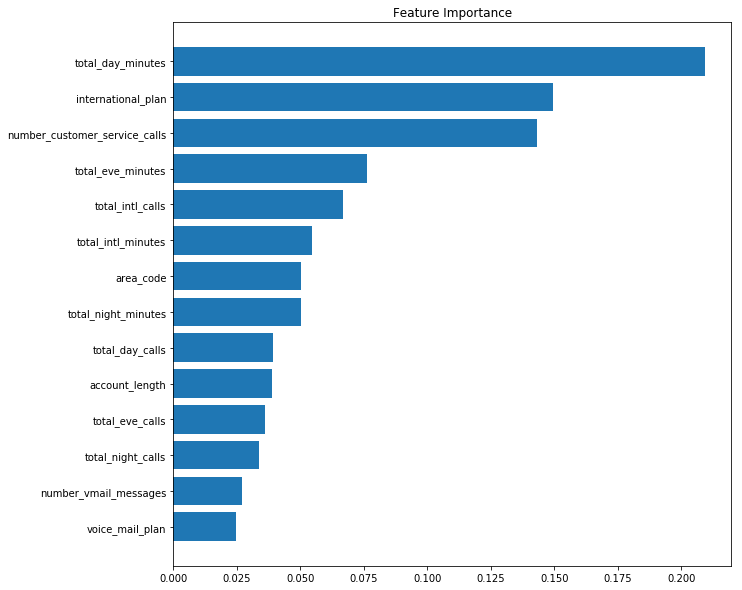

In [121]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

#### AUC & ROC Curve

ROC AUC: 0.91


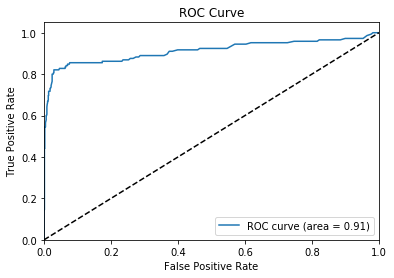

In [122]:
#from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Final Test Data Predictions

In [123]:
# #Test Data Spliting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [124]:
#Predicting test data 
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0     0    1
row_0           
0      1331  112
1        37  187

Accuracy :-  91.06
False Negative Rate :-  16.52
False Postive Rate :-  7.76


In [125]:
print(classification_report(yy,Churn_Pred))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95      1443
          1       0.63      0.83      0.72       224

avg / total       0.93      0.91      0.92      1667



#### AUC & ROC over Test Data

ROC AUC: 0.92


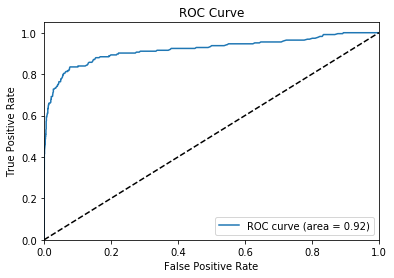

In [126]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()